<div class="jumbotron">
  <h1 class="display-4">Hello, Everyone!</h1>
  <p class="lead">We will learn some important information about stroke and what are the "common" trait of people having stroke. In this kernel we will be using some classical ML algorithms in order to detecting stroke using. I hope you will enjoy it :)</p>
  <hr class="my-4">
  <p>Arthors: Rachid Zeghlache.</p>
</div>

<h2 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; color: navy; background-color: #ffffff;">TABLE OF CONTENTS</h2>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#intro">0&nbsp;&nbsp;&nbsp;&nbsp;Introduction</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#background_motivation">I&nbsp;&nbsp;&nbsp;&nbsp;Background and motivation</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#package">II&nbsp;&nbsp;&nbsp;&nbsp;Package</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#firstlook">III&nbsp;&nbsp;&nbsp;&nbsp;First look on the data</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#EDA">IV&nbsp;&nbsp;&nbsp;&nbsp;Exploratory data analasis</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#feature_to_target">V&nbsp;&nbsp;&nbsp;&nbsp;Feature correlation to target </a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#fixing_dataset">VI&nbsp;&nbsp;&nbsp;&nbsp;Fixing the dataset (missing values and umbalanced target) </a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#modeling">VII&nbsp;&nbsp;&nbsp;&nbsp;Modeling</a></h3>

---



<h1 class="list-group-item list-group-item-action active" id="intro">0&nbsp;&nbsp;Introduction</h1>

**What cause a stroke**        |  **How to detect a stroke**
:-------------------------:|:-------------------------:
![](https://www.mayoclinic.org/-/media/kcms/gbs/patient-consumer/images/2013/11/15/17/44/ds00150_ds01030_my00077_im00074_r7_ischemicstrokethu_jpg.jpg)  |  ![](https://www.cedars-sinai.org/content/dam/cedars-sinai/blog/2019/05/signs-of-a-stroke.jpg)

<h1 class="list-group-item list-group-item-action active" id="background-information">I&nbsp;&nbsp;Background and motivation</h1>

- Background: **A stroke occurs when the blood supply to part of your brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Brain cells begin to die in minutes.**
  **A stroke is a medical emergency, and prompt treatment is crucial. Early action can reduce brain damage and other complications.**
    **The good news is that many fewer Americans die of stroke now than in the past. Effective treatments can also help prevent disability from stroke.**

- Motivation : **Our objective is to understand what are the reasons that cause stroke to peoeple and see if we can succefully detect stroke on some features using ML technics**

<h1 class="list-group-item list-group-item-action active" id="package">II&nbsp;&nbsp;The Package</h1>

![](https://media.giphy.com/media/3otPoNMCHgEfLaO1NK/giphy.gif)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sklearn

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, roc_curve,precision_recall_curve, auc,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.impute import KNNImputer

from xgboost import XGBClassifier

from catboost import CatBoostClassifier


<h1 class="list-group-item list-group-item-action active" id="firstlook">III&nbsp;&nbsp;First look of the data</h1>

![](https://media.giphy.com/media/gd6bBl4IExkXPK07Kx/giphy.gif)

In [2]:
df = pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df = df.drop('id', axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [6]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

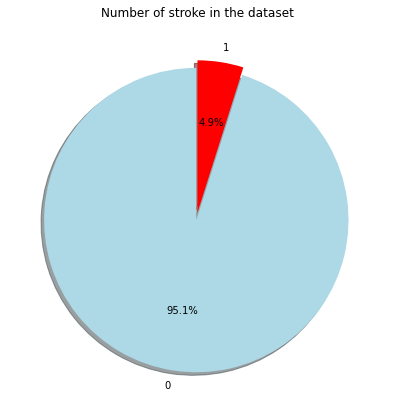

In [7]:
labels =df['stroke'].value_counts(sort = True).index
sizes = df['stroke'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Number of stroke in the dataset')
plt.show()

In [8]:
#  Using Lable encoding
le = LabelEncoder()
en_df = df.apply(le.fit_transform)
en_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3850,239,1,1
1,0,82,0,0,1,3,0,3588,418,2,1
2,1,101,0,1,1,2,0,2483,198,2,1
3,0,70,0,0,1,2,1,3385,217,3,1
4,0,100,1,0,1,3,0,3394,113,2,1



<div class="alert alert-danger" role="alert">
  <h4 class="alert-heading">⛔️⛔️⛔️</h4>
  <p>Just by this brief looking we report two things this dataset is very unbanlaced and also we go some missing values on the BMI feauture.</p>
  <hr>
  <p class="mb-0">Before using any modeling we should solve issues</p>
</div>



<h1 class="list-group-item list-group-item-action active" id="EDA">IV&nbsp;&nbsp;Exploratory data analysis (EDA)</h1>

In [9]:
def plot_hist(col, bins=30, title="",xlabel="",ax=None):
    sns.distplot(col, bins=bins,ax=ax)
    ax.set_title(f'Histogram of {title}',fontsize=20)
    ax.set_xlabel(xlabel)

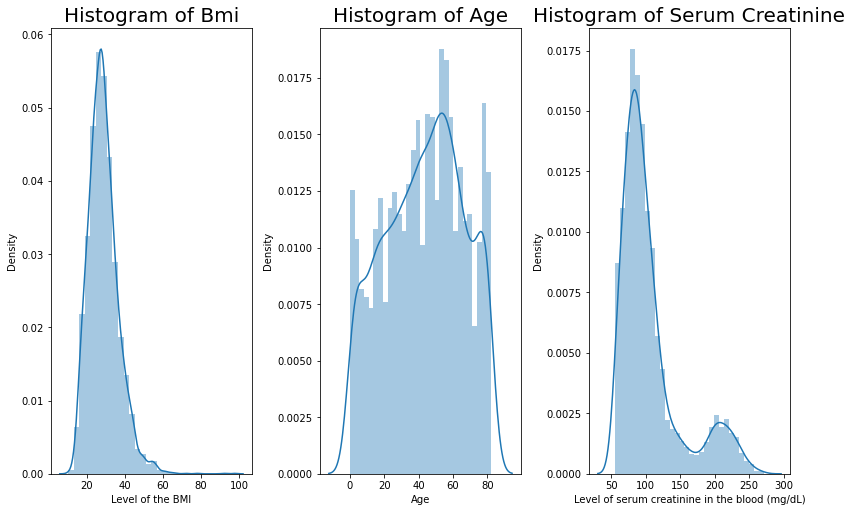

In [10]:
fig, axes = plt.subplots(1,3,figsize=(11,7),constrained_layout=True)
plot_hist(df.bmi,
          title='Bmi',
          xlabel="Level of the BMI",
          ax=axes[0])
plot_hist(df.age,
          bins=30,
          title='Age',
          xlabel='Age',
          ax=axes[1])
plot_hist(df.avg_glucose_level,
          title='Serum Creatinine', 
          xlabel='Level of serum creatinine in the blood (mg/dL)',
          ax=axes[2])

plt.show()



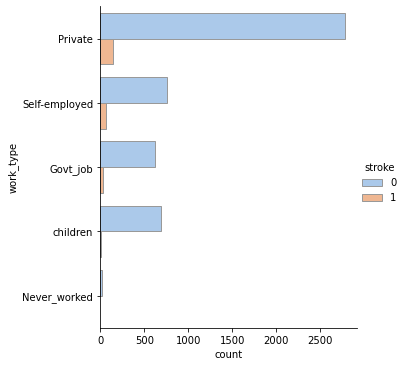

In [11]:
sns.catplot(y="work_type", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

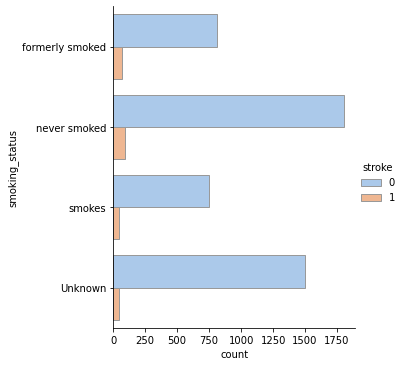

In [12]:
sns.catplot(y="smoking_status", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

<div class="alert alert-warning" role="alert">
  <h4 class="alert-heading">Observation 🔎🔎🔎.</h4>
  <p> 📌 1. In term of proportion private and self-employed have the similar amount of people having a stroke. However people from the gouvernment are more likely to not have a stroke compared to both first gategories moreover chlidren are not very likekly to get a stroke. Maybe that could be explain due to the degree of pressure felt by workers</p>
  <hr>
  <p class="mb-0"> 📌 2. Surprisingly, it seems that the stroke is not highly corralated to smokers since the proportion of person having a stroke is fairly the same among the different smoking status.</p>
</div>

<Figure size 1224x504 with 0 Axes>

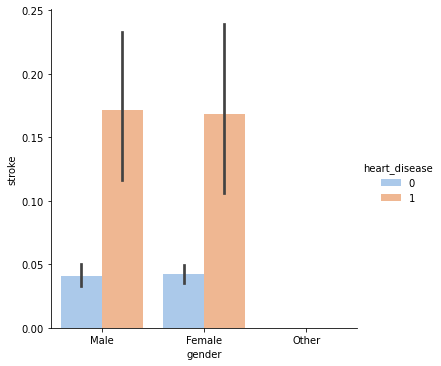

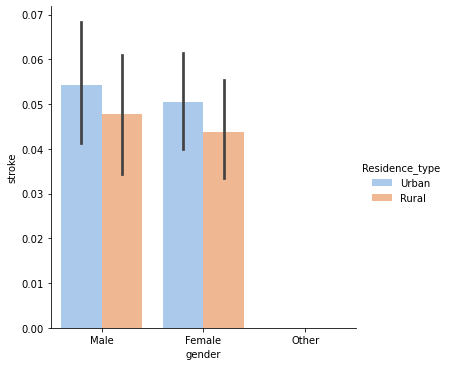

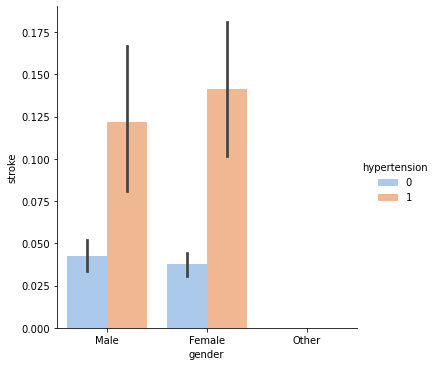

In [13]:
plt.figure(figsize=(17,7))
sns.catplot(x="gender", y="stroke", hue="heart_disease", palette="pastel", kind="bar", data=df)
sns.catplot(x="gender", y="stroke", hue="Residence_type", palette="pastel", kind="bar", data=df)
sns.catplot(x="gender", y="stroke", hue="hypertension", palette="pastel", kind="bar", data=df)
plt.show()


<div class="alert alert-warning" role="alert">
  <h4 class="alert-heading">Observation 🔎🔎🔎.</h4>
  <p>📌 1. We can see from the plots that the gender is not a feature that descriminate a person having a stroke or not.</p>
  <hr>
  <p>📌 2. Hypertension and heart disease features are correlated to stroke as we could expect.</p>
  <hr>
  <p>📌 3. Rural person are less prone to strole than urban people, it seems that the polution is a correlatede to having stroke.</p>
  <hr>
   
</div>


In [14]:
len_data = len(df)
len_w = len(df[df["gender"]=="Male"])
len_m = len_data - len_w

men_stroke = len(df.loc[(df["stroke"]==1)&(df['gender']=="Male")])
men_no_stroke = len_m - men_stroke

women_stroke = len(df.loc[(df["stroke"]==1) & (df['gender']=="Female")])
women_no_stroke = len_w - women_stroke

labels = ['Men with stroke','Men healthy','Women with stroke','Women healthy']
values = [men_stroke, men_no_stroke, women_stroke, women_no_stroke]

fig = go.Figure(data=[go.Pie(labels=labels, values=values,textinfo='label+percent',hole=0.4)])
fig.update_layout(
    title_text="Distribution of stroke EVENT according to their gender")
fig.show()

In [15]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

<h1 class="list-group-item list-group-item-action active" id="feature_to_target">V&nbsp;&nbsp;Feature correlation to target</h1>

In [16]:
fig = px.parallel_categories(df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type',
       'smoking_status', 'stroke']], color='stroke', color_continuous_scale=px.colors.sequential.Inferno)
fig.show()



<div class="alert alert-info" role="alert">
  I really like to plot this kind of map in order to have global view what brings you to a certain, in our case is stroke.
</div>

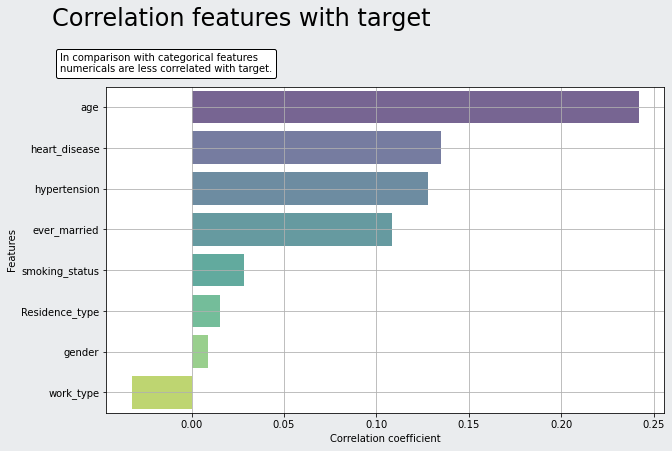

In [17]:
features=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type',
       'smoking_status']
from matplotlib.offsetbox import AnchoredText
correlation_table = []
for cols in features:
    y = en_df["stroke"]
    x = en_df[cols]
    corr = np.corrcoef(x, y)[1][0]
    dict ={
        'Features': cols,
        'Correlation coefficient' : corr,
        'Feat_type': 'numerical'
    }
    correlation_table.append(dict)
dF1 = pd.DataFrame(correlation_table)
fig = plt.figure(figsize=(10,6), facecolor='#EAECEE')
ax = sns.barplot(x="Correlation coefficient", y="Features", 
                     data=dF1.sort_values("Correlation coefficient", ascending=False),
                     palette='viridis', alpha=0.75)
ax.grid()
#ax.set_title("Correlation of numerical features with Target", fontsize=20, y=1.05)

title =  'Correlation features with target'
sub_title = 'In comparison with categorical features \
\nnumericals are less correlated with target.'

plt.gcf().text(0.05, 1.02, title, fontsize=24)
#plt.gcf().text(0.05, 0.9, sub_title, fontsize=14)

at1 = AnchoredText(sub_title,
                   loc='lower left', frameon=True,
                   bbox_to_anchor=(-0.1, 1.01),
                   bbox_transform=ax.transAxes,
                   #prop=dict(size=8),
                   )
at1.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at1)

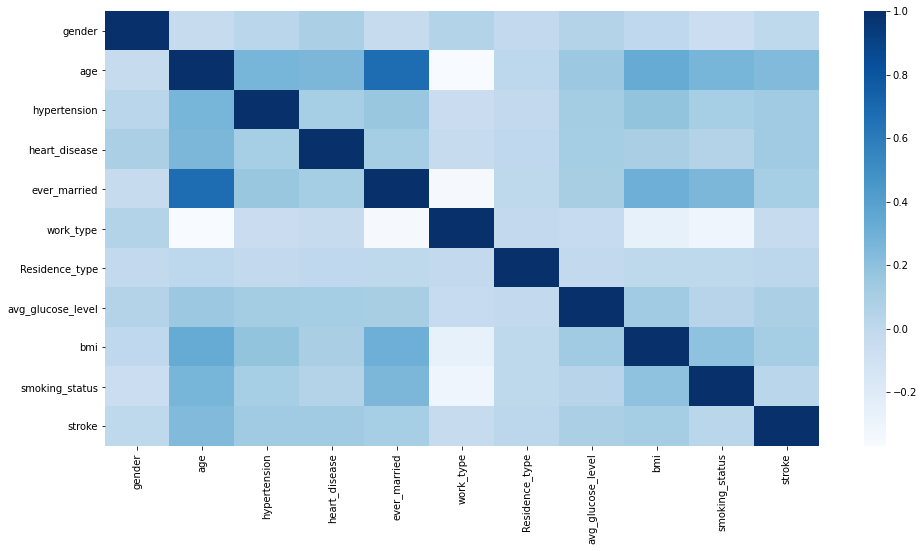

In [18]:
plt.figure(figsize=(16,8))
sns.heatmap(en_df.corr(),cmap="Blues");

Feature ranking:
1. feature 1 (0.681038)
2. feature 7 (0.107527)
3. feature 5 (0.068106)
4. feature 3 (0.030871)
5. feature 0 (0.030857)
6. feature 2 (0.029756)
7. feature 6 (0.027659)
8. feature 4 (0.024185)


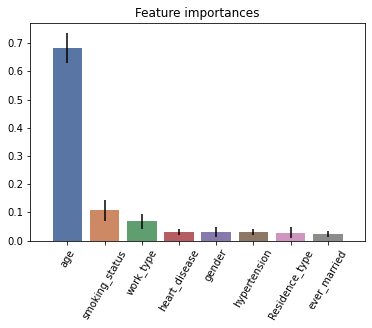

In [19]:
from sklearn.ensemble import ExtraTreesClassifier

X = en_df[features]
y = en_df['stroke']
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    
    
# Plot the impurity-based feature importances of the forest
plt.figure()

plt.title("Feature importances")
sns.barplot(x=np.array(features)[indices], y=importances[indices], palette="deep",yerr=std[indices])
plt.xticks(range(X.shape[1]), np.array(features)[indices],rotation=60)
plt.xlim([-1, X.shape[1]])
plt.show()

<h1 class="list-group-item list-group-item-action active" id="fixing_dataset">VI&nbsp;&nbsp;Fixing the dataset (Missing values and umblanced target class)</h1>

 <div class="alert alert-success" role="alert">
  <p>💡 In order to make the dataset balanced we will use the package SMOTE for oversampling. Moreover to fix the missing values in the BMI columns we use a imputation technics based on the KNN. </p>
  <hr>
</div>



In [20]:
en_df_imputed = en_df
imputer = KNNImputer(n_neighbors=4, weights="uniform")
imputer.fit_transform(en_df_imputed)


array([[  1.,  88.,   0., ..., 239.,   1.,   1.],
       [  0.,  82.,   0., ..., 418.,   2.,   1.],
       [  1., 101.,   0., ..., 198.,   2.,   1.],
       ...,
       [  0.,  56.,   0., ..., 179.,   2.,   0.],
       [  1.,  72.,   0., ..., 129.,   1.,   0.],
       [  0.,  65.,   0., ..., 135.,   0.,   0.]])

In [21]:
en_df_imputed.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [22]:
from imblearn.over_sampling import SMOTE
X , y = en_df_imputed[features],en_df_imputed["stroke"]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)
sm = SMOTE()
X_res, y_res = sm.fit_resample(x_train,y_train)

print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

print('After OverSampling, the shape of train_X: {}'.format(X_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res==0)))

Before OverSampling, counts of label '1': 249
Before OverSampling, counts of label '0': 4861 

After OverSampling, the shape of train_X: (7788, 8)
After OverSampling, the shape of train_y: (7788,) 

After OverSampling, counts of label '1': 3894
After OverSampling, counts of label '0': 3894


<h1 class="list-group-item list-group-item-action active" id="modeling">VII&nbsp;&nbsp;Modeling</h1>

In [23]:
def plot_cm(cm,title):
    z = cm
    x = ['No stroke', 'stroke']
    y = x
    # change each element of z to type string for annotations
    z_text = [[str(y) for y in x] for x in z]

    # set up figure 
    fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='deep')

    # add title
    fig.update_layout(title_text='<i><b>Confusion matrix {}</b></i>'.format(title),
                      #xaxis = dict(title='x'),
                      #yaxis = dict(title='x')
                     )

    # add custom xaxis title
    fig.add_annotation({'font':{'color':"black",'size':14},
                            'x':0.5,
                            'y':-0.10,
                            'showarrow':False,
                            'text':"Predicted value",
                            'xref':"paper",
                            'yref':"paper"})
    
    fig.add_annotation({'font':{'color':"black",'size':14},
                            'x':-0.15,
                            'y':0.5,
                            'showarrow':False,
                            'text':"Real value",
                            'textangle':-90,
                            'xref':"paper",
                            'yref':"paper"})


    # adjust margins to make room for yaxis title
    fig.update_layout(margin={'t':50, 'l':20},width=750,height=750)
    


    # add colorbar
    fig['data'][0]['showscale'] = True
    fig.show()



def hist_score(score):
    models_names = [
        'Logistic Regression',
    'KNearest Neighbor',
    'Decision Tree Classifier',
    'Random Forest Classifier',
    'Ada Boost',
    'SVM',
    'XG Boost',
    'Cat Boost']

    plt.rcParams['figure.figsize']=20,8
    sns.set_style('darkgrid')
    ax = sns.barplot(x=models_names, y=score, palette = "inferno", saturation =2.0)
    plt.xlabel('Classifier Models', fontsize = 20 )
    plt.ylabel('% of Accuracy', fontsize = 20)
    plt.title('Accuracy of different Classifier Models on test set', fontsize = 20)
    plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
    plt.yticks(fontsize = 12)
    for i in ax.patches:
        width, height = i.get_width(), i.get_height()
        x, y = i.get_xy() 
        ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
    plt.show()





In [24]:
def run_exp_on_feature(x_train,y_train,x_test,y_test):
    #x_train,x_test,y_train,y_test = train_test_split(features,labels, test_size=0.2, random_state=23)
    models= [['Logistic Regression ',LogisticRegression()],
            ['KNearest Neighbor ',KNeighborsClassifier()],
            ['Decision Tree Classifier ',DecisionTreeClassifier()],
            ['Random Forest Classifier ',RandomForestClassifier()],
            ['Ada Boost ',AdaBoostClassifier()],
            ['SVM ',SVC()],
            ['XG Boost',XGBClassifier()],
            ['Cat Boost',CatBoostClassifier(logging_level='Silent')]]

    models_score = []
    for name,model in models:

        model = model
        model.fit(x_train,y_train)
        model_pred = model.predict(x_test)
        cm_model = confusion_matrix(y_test, model_pred)
        print(cm_model)
        models_score.append(accuracy_score(y_test,model.predict(x_test)))

        print(name)
        print('Validation Acuuracy: ',accuracy_score(y_test,model.predict(x_test)))
        print('Training Accuracy: ',accuracy_score(y_train,model.predict(x_train)))
        print('############################################')
        plot_cm(cm_model,title=name+"model")
        fpr, tpr, thresholds = roc_curve(y_test, model_pred)

        fig = px.area(
            x=fpr, y=tpr,
            title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
            labels={'x':'False Positive Rate', 'y':'True Positive Rate'},
            width=700, height=500
        )
        fig.add_shape(
            type='line', line={'dash':'dash'},
            x0=0, x1=1, y0=0, y1=1
        )

        fig.update_yaxes(scaleanchor="x", scaleratio=1)
        fig.update_xaxes(constrain='domain')
        fig.show()
    
        
    return models_score




In [25]:
models_score = run_exp_on_feature(x_train,y_train,x_test,y_test)

[[967   0]
 [ 55   0]]
Logistic Regression 
Validation Acuuracy:  0.9461839530332681
Training Accuracy:  0.9525440313111546
############################################


[[960   7]
 [ 52   3]]
KNearest Neighbor 
Validation Acuuracy:  0.9422700587084148
Training Accuracy:  0.9549902152641878
############################################


[[940  27]
 [ 52   3]]
Decision Tree Classifier 
Validation Acuuracy:  0.9227005870841487
Training Accuracy:  0.9809197651663405
############################################


[[948  19]
 [ 54   1]]
Random Forest Classifier 
Validation Acuuracy:  0.9285714285714286
Training Accuracy:  0.9809197651663405
############################################


[[967   0]
 [ 55   0]]
Ada Boost 
Validation Acuuracy:  0.9461839530332681
Training Accuracy:  0.9525440313111546
############################################


[[967   0]
 [ 55   0]]
SVM 
Validation Acuuracy:  0.9461839530332681
Training Accuracy:  0.9525440313111546
############################################


[16:32:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[960   7]
 [ 53   2]]
XG Boost
Validation Acuuracy:  0.9412915851272016
Training Accuracy:  0.9620841487279843
############################################


[[958   9]
 [ 54   1]]
Cat Boost
Validation Acuuracy:  0.9383561643835616
Training Accuracy:  0.9637964774951077
############################################


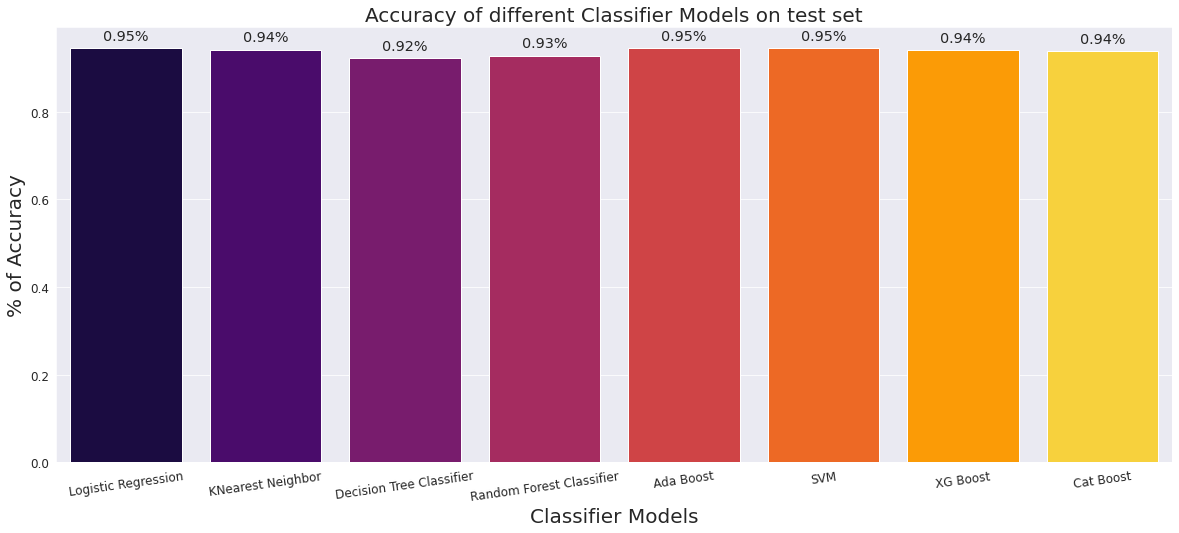

In [26]:
hist_score(models_score)

<div class="alert alert-success" role="alert">
  From the histogramme we can report that decision three algorithms are performing better than the others, lets use some grid search and cv with Xgboost algoritm to see what we can get.
</div>


In [27]:
SEED=21
def xgb_tuning(new_features,labels):
    list_scores=[]    
    parameters = {
        
        'max_depth': [3, 5, 7, 9], 
        'n_estimators': [5, 10, 15, 20, 25, 50, 100],
        'learning_rate': [0.01, 0.05, 0.1]
    }

    model_xgb = XGBClassifier(objective = "binary:logistic",
               eval_metric = "logloss",
               learning_rate = 0.1,
        random_state=SEED,
    )

    scores = ['f1','precision', 'recall']

    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()

        clf = GridSearchCV(
            model_xgb, parameters,cv=5, scoring='%s_macro' % score
        )
        clf.fit(new_features, labels)

        print(clf.cv_results_['mean_test_score']) 
        print(clf.cv_results_['std_test_score'])

        list_scores.append([clf.cv_results_['mean_test_score'][clf.best_index_],clf.cv_results_['std_test_score'][clf.best_index_]])
    return clf,list_scores

In [28]:
clf,list_scores = xgb_tuning(x_train,y_train)

# Tuning hyper-parameters for f1

[0.50234409 0.50234409 0.50234409 0.50234409 0.50234409 0.50234409
 0.49246566 0.50214413 0.50214413 0.50189364 0.49708293 0.49708293
 0.49721187 0.49214392 0.50634216 0.50640691 0.50658733 0.50176422
 0.50176422 0.5063474  0.50146742 0.50546229 0.50603804 0.50639355
 0.50157044 0.50157044 0.51065464 0.50133896 0.50234409 0.50234409
 0.50234409 0.49752678 0.49246566 0.49271623 0.49271623 0.49708293
 0.49721187 0.49721187 0.49214392 0.48733369 0.48739795 0.48752649
 0.50169947 0.50140822 0.5017639  0.49652825 0.49665767 0.50074821
 0.50558505 0.50150569 0.50138962 0.50163528 0.50120954 0.49169267
 0.49624273 0.49910541 0.50234409 0.49752678 0.49265188 0.49271623
 0.49271623 0.49271623 0.49265188 0.49714744 0.49227286 0.48733369
 0.48733369 0.48746222 0.48746222 0.49196342 0.49682505 0.49646341
 0.49195039 0.49183449 0.49631219 0.50098343 0.50403535 0.50621837
 0.51084648 0.50130316 0.49642858 0.50057369 0.50407564 0.50666199]
[0.01987329 0.01987329 0.01

In [29]:
list_scores

[[0.5108464756299612, 0.02623789781313887],
 [0.6765641670069591, 0.2453230048102843],
 [0.5110230069547763, 0.01500398523289007]]

## Thank you for watching this notenook I hope you enjoyed it. Do not hesitate to give me feedback from your own analysis :D Stay safe !